# **Tame Your Python**

Let's see how we can classify emails based on their contents

`Leggo`


In [0]:
# Dataset by : https://www.kaggle.com/venky73/spam-mails-dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def evaluate(y_test,y_pred):
  # Making the Confusion Matrix
  from sklearn.metrics import confusion_matrix
  con_mat = confusion_matrix(y_test, y_pred)
  print("===================================================")
  print(con_mat)
  from sklearn.metrics import classification_report
  print("===================================================")
  print(classification_report(y_test, y_pred))
  print("===================================================")

  # Get accuracy
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
  print('Precision score: ', format(precision_score(y_test, y_pred)))
  print('Recall score: ', format(recall_score(y_test, y_pred)))
  print('F1 score: ', format(f1_score(y_test, y_pred)))

## Get the dataset

In [3]:
import pandas as pd
data = pd.read_csv('sample_data/spam_ham_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [0]:
y = data.label_num.values

In [0]:
X = data.text

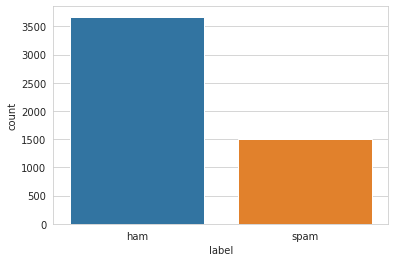

In [6]:
sns.countplot(data = data, x = 'label');

In [7]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# STEP 1 :  REMOVE STOP WORDS
stop_words = set(stopwords.words('english')) 
X = X.apply(lambda email: ' '.join([ word for word in word_tokenize(email)  if not word in stop_words]))

In [0]:
# STEP 2 :  REMOVE SUBJECT
X = X.apply(lambda email: ' '.join([ word for word in word_tokenize(email)  if not word in ["Subject"]]))

In [0]:
# STEP 2 :  REMOVE NUMBERS
X = X.apply(lambda email: ' '.join([ word for word in word_tokenize(email)  if not word.isdigit()]))

In [0]:
# punctuations = list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
# punctuations

In [0]:
# STEP 3 : REMOVE PUNCTUATIONS
# X = X.apply(lambda email: ' '.join([ word for word in word_tokenize(email) if not word in punctuations]))

In [13]:
X

0       : enron methanol ; meter # : follow note gave ...
1       : hpl nom january , ( see attached file : hpln...
2       : neon retreat ho ho ho , ' around wonderful t...
3       : photoshop , windows , office . cheap . main ...
4       : : indian springs deal book teco pvr revenue ...
                              ...                        
5166    : put ft transport volumes decreased . contrac...
5167    : / / following noms hpl ' take extra mmcf / w...
5168    : calpine daily gas nomination > > julie , men...
5169    : industrial worksheets august activity attach...
5170    : important online banking alert dear valued c...
Name: text, Length: 5171, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
X_bow = count_vector.fit_transform(X.astype(str))
#count_vector.get_feature_names()

In [0]:
X_bow  = X_bow.toarray()

In [16]:
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
X_bow = pd.DataFrame(X_bow, columns = count_vector.get_feature_names())

In [18]:
X_bow['hey'].count()

5171

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size = 0.2)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train = X_train.values
X_test = X_test.values

(4136, 45595)
(4136,)
(1035, 45595)
(1035,)


In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 10), n_estimators = 50)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()


In [23]:
# Let's see how many spam emails we have 
print(str(y_train.sum()) + " out of " + str(len(y_train)) + " were spam")

1178 out of 4136 were spam


In [24]:
evaluate(y_test,y_pred)

[[687  27]
 [ 33 288]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       714
           1       0.91      0.90      0.91       321

    accuracy                           0.94      1035
   macro avg       0.93      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035

Accuracy score:  0.9420289855072463
Precision score:  0.9142857142857143
Recall score:  0.897196261682243
F1 score:  0.9056603773584906


In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
evaluate(y_test,y_pred)

[[683  31]
 [ 15 306]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       714
           1       0.91      0.95      0.93       321

    accuracy                           0.96      1035
   macro avg       0.94      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

Accuracy score:  0.9555555555555556
Precision score:  0.9080118694362018
Recall score:  0.9532710280373832
F1 score:  0.9300911854103344
